## Load dataset

In [24]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('world data 23.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

## Agriculture

In [157]:
ctr = df['Country']
agr = df['Agricultural Land( %)']
ld = df['Land Area(Km2)']
mdf = pd.concat([ctr, agr, ld], axis=1)

In [158]:
# Check for nulls
# mdf.notna()
miss = mdf.isna().sum()

# Calculate percentage of missing values
miss_pct = miss/len(mdf) * 100
miss_pct

Country                  0.000000
Agricultural Land( %)    3.589744
Land Area(Km2)           0.512821
dtype: float64

In [159]:
# Dropping rows with nulls
data = mdf.dropna()
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                188 non-null    object
 1   Agricultural Land( %)  188 non-null    object
 2   Land Area(Km2)         188 non-null    object
dtypes: object(3)
memory usage: 4.5+ KB


In [160]:
# Clean column to remove extra characters
data['Agricultural Land( %)'] = data['Agricultural Land( %)'].str.strip('%')
data['Land Area(Km2)'] = data['Land Area(Km2)'].str.replace(',', '')

In [161]:
# Convert data types
data['Agricultural Land( %)'] = pd.to_numeric(data['Agricultural Land( %)'])
data['Land Area(Km2)'] = pd.to_numeric(data['Land Area(Km2)'])

In [162]:
# Largest countries
data = data.sort_values(by='Land Area(Km2)', ascending=False)
data = data.reset_index(drop=True)
data.head(10)

,Country,Agricultural Land( %),Land Area(Km2)
0,Russia,13.3,17098240
1,Canada,6.9,9984670
2,United States,44.4,9833517
3,China,56.2,9596960
4,Brazil,33.9,8515770
5,Australia,48.2,7741220
6,India,60.4,3287263
7,Argentina,54.3,2780400
8,Kazakhstan,80.4,2724900
9,Algeria,17.4,2381741


In [163]:
# Calculating area of land put to agricultural use
data['Agrispace'] = (data['Agricultural Land( %)'] * data['Land Area(Km2)'])/100

In [166]:
# Countries with largest agricultural space
data = data.sort_values(by='Agrispace', ascending=False)
data = data.reset_index(drop=True)
data.head(20)

,Country,Agricultural Land( %),Land Area(Km2),Agrispace
0,China,56.2,9596960,5393491.520
1,United States,44.4,9833517,4366081.548
2,Australia,48.2,7741220,3731268.040
3,Brazil,33.9,8515770,2886846.030
4,Russia,13.3,17098240,2274065.920
5,Kazakhstan,80.4,2724900,2190819.600
6,India,60.4,3287263,1985506.852
7,Saudi Arabia,80.8,2149690,1736949.520
8,Argentina,54.3,2780400,1509757.200
9,Mongolia,71.5,1564116,1118342.940


In [167]:
# Countries with high percentages of agricultural land
data = data.sort_values(by='Agricultural Land( %)', ascending=False)
data = data.reset_index(drop=True)
data.head(20)

,Country,Agricultural Land( %),Land Area(Km2),Agrispace
0,Uruguay,82.6,176215,145553.590
1,Saudi Arabia,80.8,2149690,1736949.520
2,Kazakhstan,80.4,2724900,2190819.600
3,South Africa,79.8,1219090,972833.820
4,Burundi,79.2,27830,22041.360
5,Nigeria,77.7,923768,717767.736
6,Lesotho,77.6,30355,23555.480
7,El Salvador,76.4,21041,16075.324
8,Syria,75.8,185180,140366.440
9,Eritrea,75.2,117600,88435.200


## Tax

In [200]:
# Prepare tax dataframe
ctr = df['Country'] 
rev = df['Tax revenue (%)'].str.strip('%')
rate = df['Total tax rate'].str.strip('%')
taxdf = pd.concat([ctr, rev, rate], axis=1)

In [201]:
taxdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          195 non-null    object
 1   Tax revenue (%)  169 non-null    object
 2   Total tax rate   183 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [202]:
# Calculate percentage of missing values
miss = taxdf.isna().sum()
miss_pct = miss/len(taxdf) * 100
miss_pct

Country             0.000000
Tax revenue (%)    13.333333
Total tax rate      6.153846
dtype: float64

In [203]:
# Drop nulls
taxdf = taxdf.dropna()
taxdf = taxdf.reset_index(drop=True)

# Convert columns to numeric
taxdf['Tax revenue (%)'] = pd.to_numeric(taxdf['Tax revenue (%)'])
taxdf['Total tax rate'] = pd.to_numeric(taxdf['Total tax rate'])

taxdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          167 non-null    object 
 1   Tax revenue (%)  167 non-null    float64
 2   Total tax rate   167 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


In [204]:
# Highest tax rates
taxdf = taxdf.sort_values(by='Total tax rate', ascending=False)
taxdf = taxdf.reset_index(drop=True)
taxdf.head(20)

,Country,Tax revenue (%),Total tax rate
0,Argentina,10.1,106.3
1,Bolivia,17.0,83.7
2,Equatorial Guinea,6.1,79.4
3,Palau,21.3,76.6
4,Central African Republic,8.6,73.3
5,Afghanistan,9.3,71.4
6,Colombia,14.4,71.2
7,Guinea,10.8,69.3
8,Tajikistan,9.8,67.3
9,Algeria,37.2,66.1


In [205]:
# Highest tax revenues 
taxdf = taxdf.sort_values(by='Tax revenue (%)', ascending=False)
taxdf = taxdf.reset_index(drop=True)
taxdf.head(20)

,Country,Tax revenue (%),Total tax rate
0,Algeria,37.2,66.1
1,Seychelles,34.1,30.1
2,Denmark,32.4,23.8
3,Lesotho,31.6,13.6
4,Solomon Islands,29.5,32.0
5,New Zealand,29.0,34.6
6,Sweden,27.9,49.1
7,South Africa,27.5,29.2
8,Barbados,27.5,35.6
9,Namibia,27.1,20.7


In [3]:
# Tax rate to revenue ratio
taxdf['Tax return'] = taxdf['Tax revenue (%)']/taxdf['Total tax rate']
taxdf = taxdf.sort_values(by='Tax return', ascending=False)
taxdf = taxdf.reset_index(drop=True)
taxdf.head(20)

NameError: name 'taxdf' is not defined

## Economy 

In [7]:
# Prepare tax dataframe
ctr = df['Country'] 
gdp = df['GDP'].str.strip('$').str.replace(',', '')
wage = df['Minimum wage'].str.strip('$')
gdf = pd.concat([ctr, gdp, wage], axis=1)

In [8]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       195 non-null    object
 1   GDP           193 non-null    object
 2   Minimum wage  150 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [9]:
# Convert columns to numeric
gdf['GDP'] = pd.to_numeric(gdf['GDP'])
gdf['Minimum wage'] = pd.to_numeric(gdf['Minimum wage'])

# Rename column 
gdf.rename(columns={'Minimum wage': 'Minimum wage($)'}, inplace=True)


# Drop nulls
gdf = gdf.dropna()
gdf = gdf.reset_index(drop=True)

gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          150 non-null    object 
 1   GDP              150 non-null    float64
 2   Minimum wage($)  150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [40]:
# Highest GDP
gdf = gdf.sort_values(by='GDP', ascending=False)
gdf = gdf.reset_index(drop=True)
gdf.head(20)

,Country,GDP,Minimum wage($)
0,United States,2.142770e+13,7.25
1,China,1.991000e+13,0.87
2,Japan,5.081770e+12,6.77
3,Germany,3.845630e+12,9.99
4,United Kingdom,2.827113e+12,10.13
5,France,2.715518e+12,11.16
6,India,2.611000e+12,0.30
7,South Korea,2.029000e+12,6.49
8,Brazil,1.839758e+12,1.53
9,Canada,1.736426e+12,9.51


In [41]:
# Highest wages
wdf = gdf.sort_values(by='Minimum wage($)', ascending=False)
wdf = wdf.reset_index(drop=True)
wdf.head(20)

,Country,GDP,Minimum wage($)
0,Australia,1.392681e+12,13.59
1,Luxembourg,7.110492e+10,13.05
2,Monaco,7.184844e+09,11.72
3,New Zealand,2.069288e+11,11.49
4,France,2.715518e+12,11.16
5,Republic of Ireland,3.886987e+11,10.79
6,Belgium,5.296067e+11,10.31
7,Netherlands,9.090704e+11,10.29
8,United Kingdom,2.827113e+12,10.13
9,Germany,3.845630e+12,9.99


### Visualization

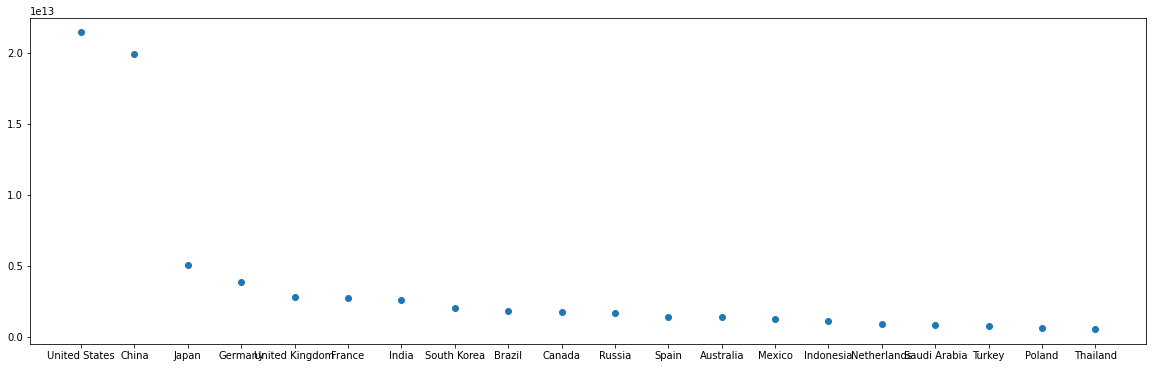

In [42]:
data = gdf.head(20)
data = data[['Country', 'GDP']]
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(x = data['Country'], y = data['GDP'])
plt.show()

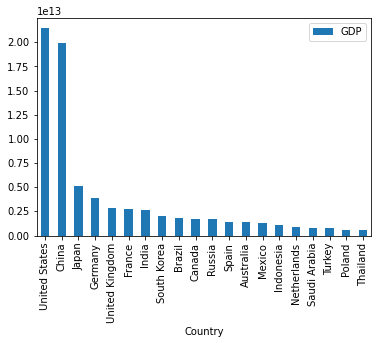

<Axes: xlabel='Country'>

In [43]:
data.plot.bar(x='Country', y='GDP')